<a href="https://colab.research.google.com/github/Yash-singh25/test_project/blob/master/Titanic_dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [0]:
from sklearn.svm import SVC

In [0]:
csv_names = ['PassengerId',	'Survived',	'Pclass',	'Name',	'Sex',	'Age',	'SibSp',	'Parch',	'Ticket',	'Fare',	'Cabin', 'Embarked']

In [0]:
dataset = pd.read_csv('/content/titanic.csv' , names= csv_names , header = 0 ,skipinitialspace=True)

In [188]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [189]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [190]:
dataset.shape

(891, 12)

In [0]:
dataset1 = dataset.dropna(axis= 1)

In [192]:
dataset1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

In [193]:
dataset1.shape

(891, 9)

In [0]:
dataset['Age'] = dataset['Age'].fillna(round(np.average(dataset['Age'])))

In [195]:
dataset1.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500


In [223]:
round(np.average(dataset['Age']))

nan

In [197]:
dataset1['Survived'].unique()

array([0, 1])

In [198]:
dataset1.groupby('Survived')['Survived'].agg('count')

Survived
0    549
1    342
Name: Survived, dtype: int64

In [199]:
dataset2.groupby('Sex')['Sex'].agg('count')['female']

314

In [200]:
dataset1[dataset1['Sex'] == 'male'].groupby('Survived')['Survived'].agg('count')

Survived
0    468
1    109
Name: Survived, dtype: int64

In [201]:
print('Total female survivors: {}'.format(dataset1[dataset1['Sex'] == 'female'].groupby('Survived')['Survived'].agg('count')[1]))
print('Total male survivors: {}'.format(dataset1[dataset1['Sex'] == 'male'].groupby('Survived')['Survived'].agg('count')[1]))
print('Total survivors: {}'.format(dataset1.groupby('Survived')['Survived'].agg('count')[1]))

Total female survivors: 233
Total male survivors: 109
Total survivors: 342


In [0]:
dataset2 = dataset1.copy()
data_pop = dataset2.pop('Ticket')

In [203]:
dataset2.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,8.0500


In [0]:
dataset2['Name'] = dataset2['Name'].apply(lambda x: x.split(',')[0])

In [205]:
dataset2.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare
0,1,0,3,Braund,male,1,0,7.2500
1,2,1,1,Cumings,female,1,0,71.2833
2,3,1,3,Heikkinen,female,0,0,7.9250
3,4,1,1,Futrelle,female,1,0,53.1000
4,5,0,3,Allen,male,0,0,8.0500


In [206]:
dataset2.groupby('Name')['Name'].agg('count')

Name
Abbing           1
Abbott           2
Abelson          2
Adahl            1
Adams            1
                ..
de Mulder        1
de Pelsmaeker    1
del Carlo        1
van Billiard     1
van Melkebeke    1
Name: Name, Length: 667, dtype: int64

In [207]:
for i in dataset2.keys():
  print('the unique values for {} is {}'.format(i , len(dataset2[i].unique())))

the unique values for PassengerId is 891
the unique values for Survived is 2
the unique values for Pclass is 3
the unique values for Name is 667
the unique values for Sex is 2
the unique values for SibSp is 7
the unique values for Parch is 7
the unique values for Fare is 248


In [0]:
dataset2['Embarked'] = dataset['Embarked']

In [0]:
dataset2['Age'] = dataset['Age'].fillna(round(np.mean(dataset2['Age'])))

In [227]:
round(np.mean(dataset2['Age']))

24

In [221]:
dataset2.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,Age
0,1,0,3,Braund,male,1,0,7.2500,S,22.0
1,2,1,1,Cumings,female,1,0,71.2833,C,38.0
2,3,1,3,Heikkinen,female,0,0,7.9250,S,26.0
3,4,1,1,Futrelle,female,1,0,53.1000,S,35.0
4,5,0,3,Allen,male,0,0,8.0500,S,35.0


In [0]:
dataset2['Embarked'] = dataset2['Embarked'].fillna('S')

In [222]:
dataset2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Age            0
dtype: int64

In [212]:
dataset2.groupby('Embarked')['Embarked'].agg('count')

Embarked
C    168
Q     77
S    646
Name: Embarked, dtype: int64

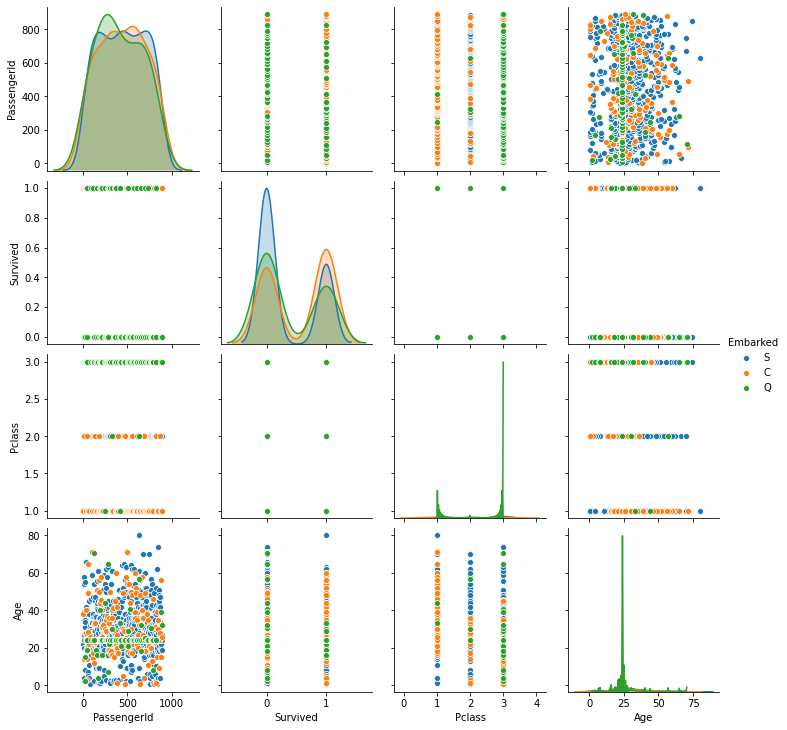

In [229]:
sns.pairplot(dataset2, vars=['PassengerId'	,'Survived'	,'Pclass' ,'Age'], hue='Embarked')

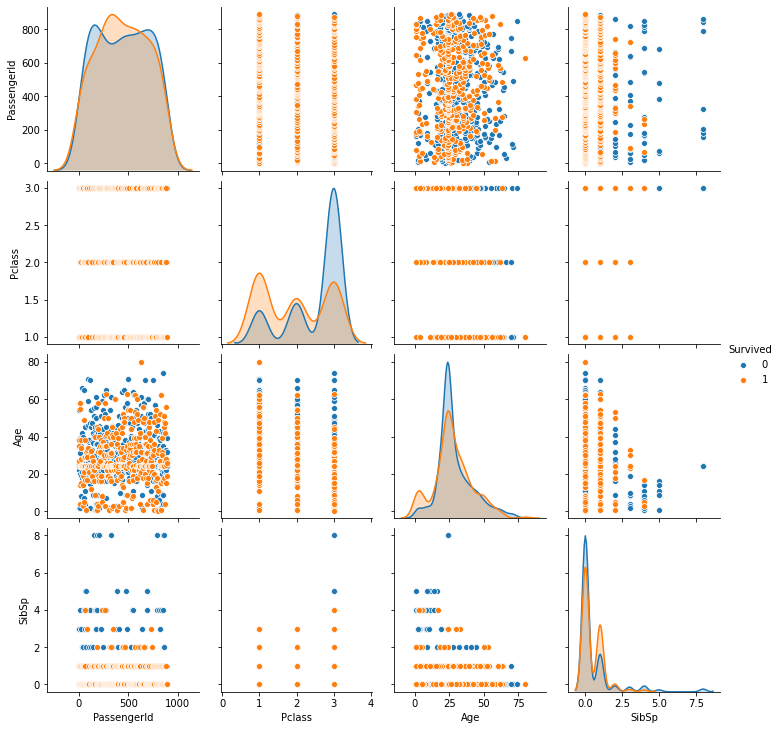

In [307]:
sns.pairplot(dataset2,vars=['PassengerId' ,'Pclass' ,'Age' , 'SibSp'], hue='Survived')

In [231]:
dataset2['Survived'].unique()

array([0, 1])

In [232]:
dataset2[dataset2['Sex'] == 'female'].groupby('Survived')['Survived'].agg('count')

Survived
0     81
1    233
Name: Survived, dtype: int64

In [233]:
dataset2['Survived'].unique()[1]

1

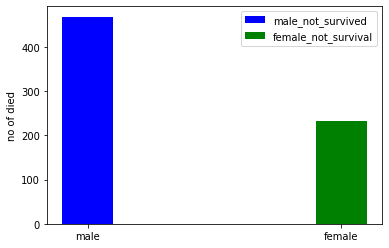

In [234]:

plt.bar(dataset2['Sex'].unique()[0],dataset2[dataset2['Sex'] == 'male'].groupby('Survived')['Survived'].agg('count'), width=0.2  ,label = 'male_not_survived', color = 'b')

plt.bar(dataset2['Sex'].unique()[1] ,dataset2[dataset2['Sex'] == 'female'].groupby('Survived')['Survived'].agg('count'), width=0.2 , label = 'female_not_survival' , color = 'g')

plt.ylabel('no of died')
plt.legend()

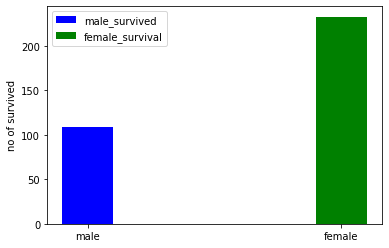

In [235]:
plt.bar(dataset2['Sex'].unique()[0] ,dataset2[dataset2['Sex'] == 'male'].groupby('Survived')['Survived'].agg('count')[1], width=0.2  ,label = 'male_survived', color = 'b')

plt.bar(dataset2['Sex'].unique()[1] ,dataset2[dataset2['Sex'] == 'female'].groupby('Survived')['Survived'].agg('count')[1], width=0.2 , label = 'female_survival' , color = 'g')
plt.ylabel('no of survived')
plt.legend()

In [0]:
female_survival_ratio = dataset2[dataset2['Sex'] == 'female'].groupby('Survived')['Survived'].agg('count')[1]/dataset2.groupby('Sex')['Sex'].agg('count')['female']

In [0]:
male_survival_ratio = dataset2[dataset2['Sex'] == 'male'].groupby('Survived')['Survived'].agg('count')[1]/dataset2.groupby('Sex')['Sex'].agg('count')['male']

In [238]:
print('the male survival ratio is :{}'.format(male_survival_ratio))
print('the female survival ratio is :{}'.format(female_survival_ratio))


the male survival ratio is :0.18890814558058924
the female survival ratio is :0.7420382165605095


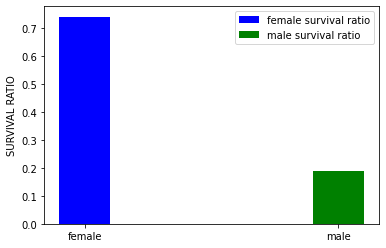

In [239]:
plt.bar(dataset2['Sex'].unique()[1] , female_survival_ratio , color = 'b' , label = 'female survival ratio' ,width=0.2)
plt.bar(dataset2['Sex'].unique()[0] , male_survival_ratio , color = 'g' , label = 'male survival ratio' , width = 0.2)

plt.ylabel('SURVIVAL RATIO')
plt.legend()

In [241]:
dataset2['Survived'].unique() == 1

array([False,  True])

In [0]:
passenger_survived = (dataset2['PassengerId'][dataset2['Survived'] == 1])-1
passenger_not_survived = (dataset2['PassengerId'][dataset2['Survived'] == 0])-1


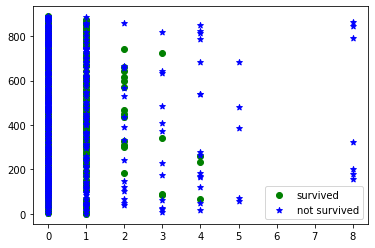

In [254]:
plt.scatter((dataset2['SibSp'][dataset2['Survived'] == 1]),passenger_survived, color = 'g' , marker = 'o' , label = 'survived')
plt.scatter((dataset2['SibSp'][dataset2['Survived'] == 0]),passenger_not_survived, color = 'b' , marker = '*' , label = 'not survived')
plt.legend()

In [257]:
dataset2.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,Age
0,1,0,3,Braund,male,1,0,7.2500,S,22.0
1,2,1,1,Cumings,female,1,0,71.2833,C,38.0
2,3,1,3,Heikkinen,female,0,0,7.9250,S,26.0
3,4,1,1,Futrelle,female,1,0,53.1000,S,35.0
4,5,0,3,Allen,male,0,0,8.0500,S,35.0


In [0]:
dataset3 = dataset2.copy()

In [0]:
dataset3 = dataset3.drop(['Name' , 'Sex' , 'Embarked' , 'Parch'] , axis=1)

In [262]:
dataset3.head()

,PassengerId,Survived,Pclass,SibSp,Fare,Age
0,1,0,3,1,7.2500,22.0
1,2,1,1,1,71.2833,38.0
2,3,1,3,0,7.9250,26.0
3,4,1,1,1,53.1000,35.0
4,5,0,3,0,8.0500,35.0


In [0]:
dataset3_target = dataset3.pop('Survived')

In [0]:
dataset3_data = dataset3
dataset3_data = dataset3_data.drop(['Age'] , axis = 1)

In [272]:
dataset3_data.head()

,PassengerId,Pclass,SibSp,Fare
0,1,3,1,7.2500
1,2,1,1,71.2833
2,3,3,0,7.9250
3,4,1,1,53.1000
4,5,3,0,8.0500


In [285]:
dataset_stats = dataset3_data.describe()
dataset_stats = dataset_stats.transpose()
dataset_stats

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.0,223.5000,446.0000,668.5,891.0000
Pclass,891.0,2.308642,0.836071,1.0,2.0000,3.0000,3.0,3.0000
SibSp,891.0,0.523008,1.102743,0.0,0.0000,0.0000,1.0,8.0000
Fare,891.0,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
min_max_scaler = MinMaxScaler()
x_train_normalized = min_max_scaler.fit_transform(x_train)
x_test_normalized = min_max_scaler.fit_transform(x_test)

In [0]:
x_train , x_test , y_train , y_test = train_test_split(dataset3_data , dataset3_target , test_size = 0.2 , random_state = 10)

LogisticRegression as my model

In [0]:
obj = LogisticRegression()
model = obj.fit(x_train_normalized , y_train)
predicted_test = obj.predict(x_test_normalized)
predicted_train = obj.predict(x_train_normalized)


In [281]:
x_train_normalized

array([[0.06404494, 1.        , 0.        , 0.01411046],
       [0.80561798, 0.5       , 0.        , 0.02049464],
       [0.48426966, 1.        , 0.125     , 0.03142511],
       ...,
       [0.59213483, 0.        , 0.        , 0.43288417],
       [0.14044944, 1.        , 0.125     , 0.02194234],
       [0.29775281, 0.5       , 0.        , 0.02049464]])

In [288]:
classification_report(y_train , predicted_train)

'              precision    recall  f1-score   support\n\n           0       0.68      0.85      0.76       432\n           1       0.62      0.38      0.47       280\n\n    accuracy                           0.67       712\n   macro avg       0.65      0.62      0.61       712\nweighted avg       0.66      0.67      0.64       712\n'

In [289]:
classification_report(y_test , predicted_test)

'              precision    recall  f1-score   support\n\n           0       0.76      0.86      0.81       117\n           1       0.65      0.48      0.56        62\n\n    accuracy                           0.73       179\n   macro avg       0.71      0.67      0.68       179\nweighted avg       0.72      0.73      0.72       179\n'

In [0]:
accuracy_test = accuracy_score(y_true=y_test , y_pred= predicted_test)

In [0]:
accuracy_train = accuracy_score(y_true=y_train , y_pred= predicted_train)

In [292]:
print(accuracy_test)
print(accuracy_train)

0.7318435754189944
0.6657303370786517


In [296]:
obj.coef_

array([[-0.12903931, -1.38842016, -0.7015236 ,  1.19846306]])

In [297]:
obj.intercept_

array([0.48121292])

SVM(Support Vector Machine) as a Model

In [0]:
obj1 = SVC(kernel='linear')
model1 = obj1.fit(x_train_normalized , y_train)
predicted1_train = obj1.predict(x_train_normalized)
predicted1_test = obj1.predict(x_test_normalized)

In [0]:
accuracy_test1 = accuracy_score(y_true = y_test , y_pred= predicted1_test)
accuracy_train1 = accuracy_score(y_true=y_train , y_pred= predicted1_train)

In [302]:
print(accuracy_test1)
print(accuracy_train1)

0.7262569832402235
0.6558988764044944
